# Comparing Modeled Bacterial Zn Adsorption with Experimental Data
This notebook will plot the output of your analyzed bacterial adsorption data along with the output of your bacterial adsorption modeling from Equilibrium Diagrams. You will need the output from the `Zinc_analysis` notebook (already provided for you) and the output from `Equilbrium Diagrams`. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()


# Load the analyzed data 
The data from the zinc-only and zinc-citrate experiments was compiled and will be loaded into two variable `Zn_data` and `Zncitrate_data`.

In [2]:
# put the uploaded csv file into a pandas dataframe
# the file name needs to match exactly to the uploaded file
Zn_data = pd.read_csv("df_zn_only.csv")
Zncitrate_data = pd.read_csv("df_citrate.csv")
# let's see what the data look like in the dataframe
Zn_data


,sample_name,pH,sampabs,tot_zn_ppm,sampconc,Znads,Znadsper
0,Z1,4.862,0.1356,3.0,2.181449,0.818551,27.285027
1,Z2,6.248,0.0525,NaN,0.907573,2.092427,69.747575
2,Z4,5.552,0.0202,NaN,0.412432,2.587568,86.252271
3,Z5,8.930,0.0761,NaN,1.269348,1.730652,57.688416
4,Z6,7.960,0.0585,NaN,0.999549,2.000451,66.681687
...,...,...,...,...,...,...,...
27,P13,3.620,0.1643,NaN,2.647046,0.352954,11.765149
28,P14,3.430,0.1563,NaN,2.524863,0.475137,15.837903
29,P15,4.560,0.1473,NaN,2.387407,0.612593,20.419751
30,P16,5.060,0.1509,NaN,2.442390,0.557610,18.587011


# Upload Equilibrium Diagrams model output
### Before you upload the model output, make sure you have edited the ouput file to remove the context information at the beginning of the file. It is critical that you have labeled the Zn-bacteria surface complexes as `L1Zn+`, `L2Zn+`, and `L3Zn+`. If they are labeled something else then edit the model output so they are labeled correctly and rerun the cell above

In [21]:
# replace the file names with your model outputs
Zn_model_file = "zn_model.csv"
Zncitrate_model_file = "citrate_model.csv"
# load the modeling output files and rename the pH column
Zn_model = pd.read_csv(Zn_model_file, sep=";")
Zn_model.rename(columns={"H+": "pH"}, inplace=True)
Zncitrate_model = pd.read_csv(Zncitrate_model_file, sep=";")
Zncitrate_model.rename(columns={"H+": "pH"}, inplace=True)
# check to make sure the bacterial surface complexes are labeled correctly
surface_complexes = ["L1Zn+", "L2Zn+", "L3Zn+"]
if {"L1Zn+", "L2Zn+", "L3Zn+"}.issubset(Zncitrate_model.columns):
    print("Continue the notebook")
else:
    print(
        "You need to relable the zinc-bacterial surface complexes in your model output to L1Zn+, L2Zn+, and L3Zn+"
    )


Continue the notebook


Now that we can access the output from `Equilibrium Diagrams`, we can add together the three Zn-surface complexes to determine the total predicted Zn adsorption as a function of pH.

In [22]:
# add the fraction of Zn adsorbed onto the sites 1, 2, and 3 to determine
# total predicted Zn adsorbed
Znmodads = Zn_model["L1Zn+"] + Zn_model["L2Zn+"] + Zn_model["L3Zn+"]
Zncitratemodads = (
    Zncitrate_model["L1Zn+"] + Zncitrate_model["L2Zn+"] + Zncitrate_model["L3Zn+"]
)


To compare total predicted Zn adsorption to the experimental data we need to plot both on a graph. In addition to that, we can also plot the contribution of Zn adsorbed to each surface site to illustrate the pH range and extent of adsorption of surface site.

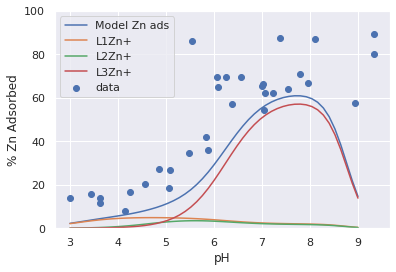

<Figure size 432x288 with 0 Axes>

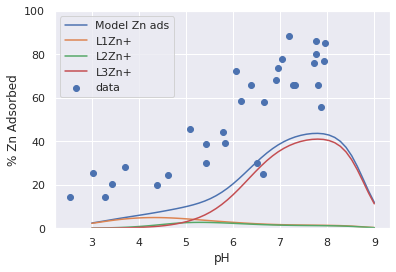

In [23]:
plt.figure()
plt.plot(Zn_model["pH"], Znmodads * 100, label="Model Zn ads")
plt.plot(Zn_model["pH"], Zn_model["L1Zn+"] * 100, label="L1Zn+")
plt.plot(Zn_model["pH"], Zn_model["L2Zn+"] * 100, label="L2Zn+")
plt.plot(Zn_model["pH"], Zn_model["L3Zn+"] * 100, label="L3Zn+")
plt.scatter(Zn_data["pH"], Zn_data["Znadsper"], label="data")
plt.xlabel("pH")
plt.ylabel("% Zn Adsorbed")
plt.ylim([0, 100])
plt.legend()
plt.show()
plt.savefig("ads_mod_plot.pdf")

plt.figure()
plt.plot(Zncitrate_model["pH"], Zncitratemodads * 100, label="Model Zn ads")
plt.plot(Zncitrate_model["pH"], Zncitrate_model["L1Zn+"] * 100, label="L1Zn+")
plt.plot(Zncitrate_model["pH"], Zncitrate_model["L2Zn+"] * 100, label="L2Zn+")
plt.plot(Zncitrate_model["pH"], Zncitrate_model["L3Zn+"] * 100, label="L3Zn+")
plt.scatter(Zncitrate_data["pH"], Zncitrate_data["Znadsper"], label="data")
plt.xlabel("pH")
plt.ylabel("% Zn Adsorbed")
plt.legend()
plt.ylim([0, 100])
# Save and download the plot
plt.savefig("ads_citrate_plot.pdf")
